 # Middle-Square Weyl Sequence RNG
 
The Middle-Square Weyl Sequence RNG method is a variation of the middle-square sequence method of PRNG where a Weyl Sequence is added to the loop. 
Infromation for the sequence was retrived from 

Widynski, Bernard. "Middle square Weyl sequence RNG." arXiv preprint arXiv:1704.00358 (2017).

Their method is defined by the intial parameters: 

    x: x value (initally set to 0)
    w: Weyl sequence (intially set to 0)
    s: seed (given as 0xb5ad4eceda1ce2a9) 
    
Their method is defined by the following steps:

    i)    Take the square of our x value
    ii)   Take the Weyl loop at the seed
    iii)  Add that value to the new x value
    iv)   Middle out the x value by shifting the bits by 32
 
In step three, we notice that the value can be above the integer limit 2^64, which means we cannot call the integer in python. This means that we will have to format the code in C.    

In [1]:
from ctypes import *
import numpy as np
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

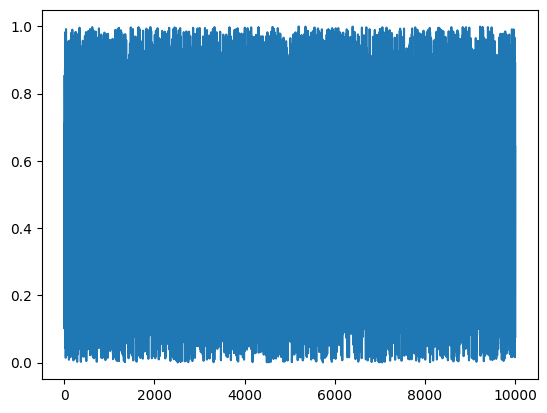

In [2]:
def MSWMethod(seed): 
    
    #c_ulonglong(value) specifies an unsigned 64 bit integer
    x = c_ulonglong(0) # x value 
    w = c_ulonglong(0) # Weyl sequence
    s = c_ulonglong(seed) # seed
    
    N = 10000
    results = []
    
    for i in range(N):
        # Following the steps
        x.value *= x.value
        w.value += s.value
        x.value += w.value
        x.value = (x.value >> 32) | (x.value << 32) # Shifting the bits by 32
        results.append(x.value)
    
    return results

 
results = np.divide(MSWMethod(seed=0xb5ad4eceda1ce2a9), 2**64) # Range of 0 < x < 1

x = range(len(results))
plt.plot(x, results)
plt.show  

In [13]:
'''Dice Test'''

def MSWMethod_Dice(seed): 
    
    #c_ulonglong(value) specifies an unsigned 64 bit integer
    x = c_ulonglong(0) # x value 
    w = c_ulonglong(0) # Weyl sequence
    s = c_ulonglong(seed) # seed
    
    results = []
    
    N = 10000
    for i in range(N):
        # Following the steps
        x.value *= x.value
        w.value += s.value
        x.value += w.value
        x.value = (x.value >> 32) | (x.value << 32) # Shifting the bits by 32
        
        val = x.value
        dval = 6*val/2**64 # Dice Value (0-6)
        
        if dval <= 1:
            dval = 1
        elif dval <= 2:
            dval = 2
        elif dval <= 3:
            dval = 3
        elif dval <= 4:
            dval = 4
        elif dval <= 5:
            dval = 5
        elif dval <= 6:
            dval = 6
        results.append(dval)
    
    return results    

<function matplotlib.pyplot.show(close=None, block=None)>

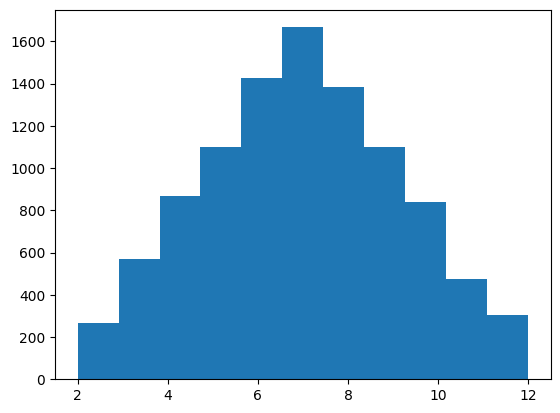

In [18]:
'''Rolling Two Dice Once'''

# Change the seed on the second dice
results = MSWMethod_Dice(seed=0xb5ad4eceda1ce2a9)
results_1 = MSWMethod_Dice(seed=0xb6ad4eceda1ce3a9)
two_dice = np.add(results, results_1)

plt.hist(two_dice, bins=11)
plt.show 

<function matplotlib.pyplot.show(close=None, block=None)>

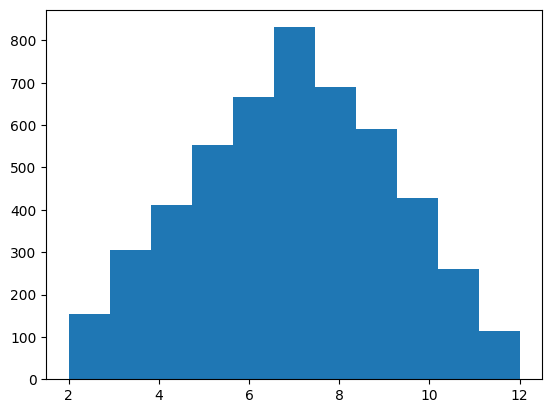

In [19]:
'''Rolling One Dice Twice'''

results = MSWMethod_Dice(seed=0xb5ad4eceda1ce2a9)

# Add consecutive values in the list together
one_di = [sum(results[i:i+2]) for i in range(0, len(results), 2)]

plt.hist(one_di, bins=11)
plt.show